# [DF907_02]

## 2. 영상의 컬러 공간 변환

이미지를 컬러 이미지로 읽어와서    
  
(1) Gray, YUV, HSV로 변환해보자.    
(2) Y, U, V 값을 출력해서 비교해보자.    
(3) H, S, V 값을 출력해서 비교해보자.  
(4) 분리한 영상 채널들을 다시 병합하여 원래의 영상과 동일한지 확인해보자.  

>이미지의 컬러(Color)는 흔희 잘 알려져 있는 RGB뿐만 아니라 대표적으로 YUV, HSV 등이 있다. RGB는 R(Red), G(Green), B(Blue) 값의 조합에 따라 다양한 컬러가 표현되는 가장 잘 알려진 컬러 공간이다. YUV에서 Y는 밝기 정보를, U/V는 컬러 정보를 나타낸다. HSV는 Hue는 인간의 시각이 구분하는 색조, Saturation은 채도로서 해당 색조의 강도, Value는 명도로서 빛의 에너지 강도에 따라 감각적으로 느끼는 밝기를 나타내며 컬러의 세 가지 특성을 분리해 원통형 시스템으로 각 채널을 나타낸다.

#### (1) Gray, YUV, HSV로 변환해보자.

In [1]:
import cv2

img = cv2.imread('DF907_01_01.jpg', 1) 

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Gray', img_gray)

img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
cv2.imshow('YUV', img_yuv)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow('HSV', img_hsv)

cv2.waitKey(0)
cv2.destroyAllWindows() # 아무 키 누르면 전체 창들 다 닫힘!

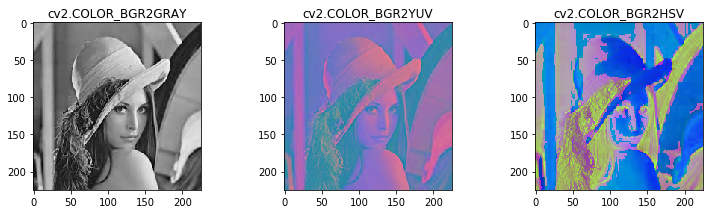

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,3,1)
plt.imshow(img_gray, cmap="gray") # cmap='gray' 부분을 써 주어야 matplotlib이 흑백 사진을 제대로 출력!
plt.title('cv2.COLOR_BGR2GRAY')

plt.subplot(1,3,2)
plt.imshow(img_yuv)
plt.title('cv2.COLOR_BGR2YUV')

plt.subplot(1,3,3)
plt.imshow(img_hsv)
plt.title('cv2.COLOR_BGR2HSV')

plt.show()

# YUV와 HSV는 plot에 나타내면 색깔 다르게 나타남... gray는 cmap으로 해결.. 나머지는..?

#### (2) Y, U, V 값을 출력해서 비교해보자.

In [3]:
yuv_y, yuv_u, yuv_v = cv2.split(img_yuv)

cv2.imshow("YUV", img_yuv)
cv2.imshow("Y", yuv_y)
cv2.imshow("U", yuv_u)
cv2.imshow("V", yuv_v)

cv2.waitKey(0)
cv2.destroyAllWindows()

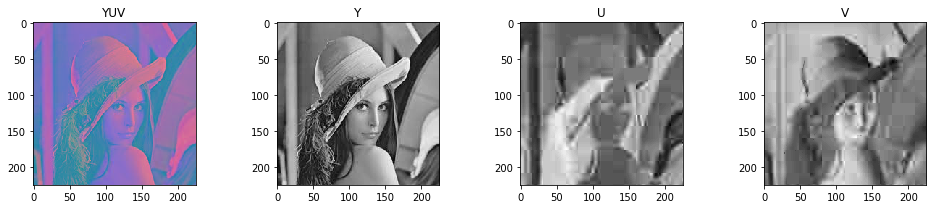

In [4]:
plt.figure(1, figsize=(16, 3.2))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,4,1)
plt.imshow(img_yuv, cmap="gray") # cmap='gray' 부분을 써 주어야 matplotlib이 흑백 사진을 제대로 출력!
plt.title('YUV')

plt.subplot(1,4,2)
plt.imshow(yuv_y, cmap="gray")
plt.title('Y')

plt.subplot(1,4,3)
plt.imshow(yuv_u, cmap="gray")
plt.title('U')

plt.subplot(1,4,4)
plt.imshow(yuv_v, cmap="gray")
plt.title('V')

plt.show()

# YUV는 cmap 어떻게 해야 정확하게 plot으로 표현...?

#### (3) H, S, V 값을 출력해서 비교해보자.

In [5]:
hsv_h, hsv_s, hsv_v = cv2.split(img_hsv)

cv2.imshow("HSV", img_hsv)
cv2.imshow("H", hsv_h)
cv2.imshow("S", hsv_s)
cv2.imshow("V", hsv_v)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### (4) 분리한 영상 채널들을 다시 병합하여 원래의 영상과 동일한지 확인해보자.

In [6]:
img_yuv2 = cv2.merge([yuv_y, yuv_u, yuv_v])
cv2.imshow("yuv", img_yuv)
cv2.imshow("yuv2", img_yuv2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
img_hsv2 = cv2.merge([hsv_h, hsv_s, hsv_v])
cv2.imshow("hsv", img_hsv)
cv2.imshow("hsv2", img_hsv2)

cv2.waitKey(0)
cv2.destroyAllWindows()

## [ 컬러공간 변환, 분리, 병합 ]

### < cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) : 컬러공간 변환(convert) >
* cv2.COLOR_BGR2GRAY : BGR -> GRAY
* cv2.COLOR_BGR2YUV : BGR -> YUV
* cv2.COLOR_BGR2HSV : BGR -> HSV

### < cv2.split(img_yuv) : 각 채널 분리>
yuv_y, yuv_u, yuv_v = cv2.split(img_yuv) => 이런식으로 Y,U,V 채널 각각 변수에 담는다.  

### < cv2.merge([yuv_y, yuv_u, yuv_v]) : 각 채널 병합 >
img_yuv2 = cv2.merge([yuv_y, yuv_u, yuv_v]) => 이런식으로 세 채널을 하나로 병합한다.

### cf. cv2.waitKey(0) 와 cv2.destroyAllWindows()
* **cv2.waitKey(0)** : 계속 연속적으로 키 확인. 키가 눌리지 않으면 다음 코드로 넘어가지 않음.
* **cv2.destroyAllWindows()** : 아무 키 눌리면 모든 창들 다 꺼짐.

> YUV와 HSV는 plot에 나타내면 색깔 다르게 나타나는 현상에 대해서... (gray는 cmap="gray"으로 해결)
(참고 링크 : https://matplotlib.org/tutorials/introductory/images.html)